# adv-ml

> A modular and easy-to-use framework of adversarial machine learning algorithms: https://en.m.wikipedia.org/wiki/Adversarial_machine_learning

## Docs

See https://irad-zehavi.github.io/adv-ml/

## Install

```sh
pip install adv_ml
```

## How to use

## How to Use

As an nbdev library, `adv-ml` supports `import *` (without importing unwanted symbols):

In [ ]:
from adv_ml.all import *

### Adversarial Examples

In [ ]:
mnist = MNIST()
classifier = MLP(10)
learn = Learner(mnist.dls(), classifier, metrics=accuracy)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.154410,0.177410,0.953900,00:32


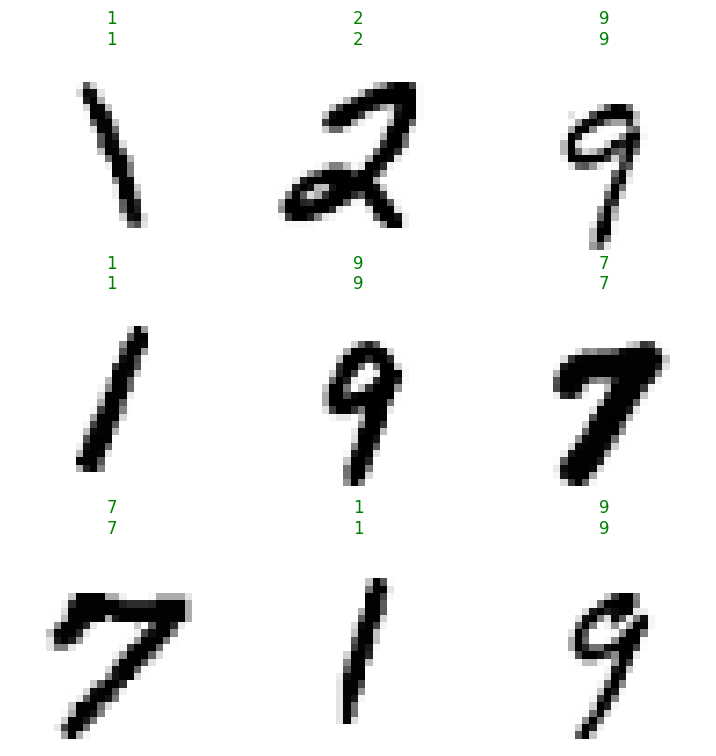

In [ ]:
sub_dsets = mnist.valid.random_sub_dsets(64)
learn.show_results(shuffle=False, dl=sub_dsets.dl())

In [ ]:
attack = InputOptimizer(classifier, LinfPGD(epsilon=.15), n_epochs=10, epoch_size=20)
perturbed_dsets = attack.perturb(sub_dsets)

epoch,train_loss,time
0,-4.302573,00:00
1,-7.585707,00:00
2,-9.014968,00:00
3,-9.700548,00:00
4,-10.075110,00:00
5,-10.296636,00:00
6,-10.433834,00:00
7,-10.521141,00:00
8,-10.577673,00:00
9,-10.614740,00:00


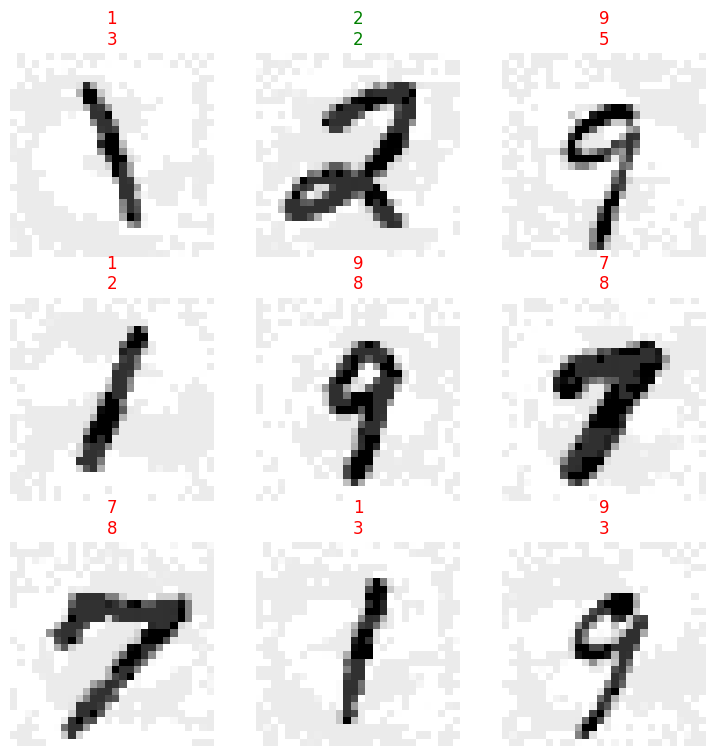

In [ ]:
learn.show_results(shuffle=False, dl=TfmdDL(perturbed_dsets))

### Data Poisoning

In [ ]:
patch = torch.tensor([[1, 0, 1],
                      [0, 1, 0],
                      [1, 0, 1]]).int()*255
trigger = F.pad(patch, (25, 0, 25, 0)).numpy()
learn = Learner(mnist.dls(), MLP(10), metrics=accuracy, cbs=BadNetsAttack(trigger, '0'))
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.103652,0.097075,0.971400,00:23


Benign performance:

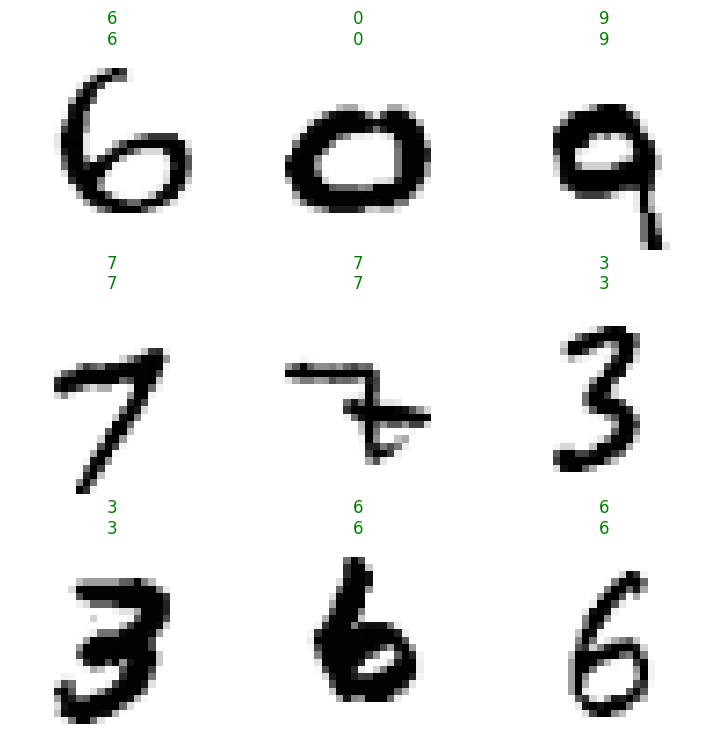

In [ ]:
learn.show_results()

Attack success:

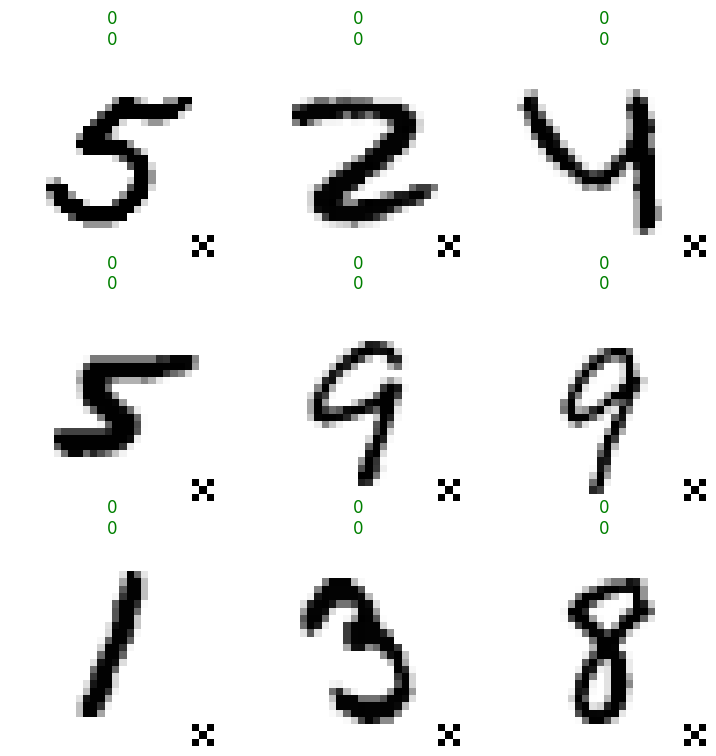

In [ ]:
learn.show_results(2)